# Book Recommendation System: Collaborative Filtering

## Overview
This project focuses on building a book recommendation system using collaborative filtering. Collaborative filtering is a technique used in recommendation systems to predict user preferences by collecting preferences from many users. The goal is to recommend books to users based on their past interactions and similarities with other users.

## Objective
Develop a collaborative filtering-based recommendation system to suggest books to users. The project will cover the complete pipeline, including data loading, exploratory data analysis, data preparation, model building, evaluation, and visualization.

## Learning Outcomes
1. Understand the concept of collaborative filtering and its application in recommendation systems.
2. Learn to preprocess and analyze user-item interaction data.
3. Gain experience in building a user-item matrix and computing user similarities.
4. Implement a recommendation system using cosine similarity.
5. Evaluate the recommendation system using metrics like Mean Squared Error (MSE).
6. Visualize user similarities and analyze the most recommended books.

---

## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. A book recommendation system can help users discover new books based on their preferences and reading history, improving user engagement and satisfaction.

### Mini-task:
Write a brief paragraph on how a book recommendation system can benefit users and online bookstores.

---

A book recommendation system benefits users by helping them discover new books that match their interests and reading history, making it easier to find enjoyable content without extensive searching. For online bookstores, such systems increase user engagement and satisfaction, encourage repeat visits, and can boost sales by promoting books that users are more likely to purchase based on personalized suggestions.

## Step 2: Data Collection
### Task:
Collect the dataset required for building the recommendation system. The dataset used in this project includes two files: `ratings.csv` and `books.csv`.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first 10 rows.

```python
import pandas as pd

# Load the dataset
ratings = pd.read_csv('ratings.csv')
books = pd.read_csv('books.csv')

# Display the first 10 rows of each dataset
### YOUR CODE HERE ###
```

---

In [ ]:
# Install dependencies as needed:
# %pip install kagglehub[pandas-datasets]
# import kagglehub
# from kagglehub import KaggleDatasetAdapter
import pandas as pd

# Load ratings.csv
ratings_df = pd.read_csv("data/ratings.csv")

# Load books.csv
books_df = pd.read_csv("data/books.csv")

print("First 10 records of ratings.csv:", ratings_df.head(10))
print("First 10 records of books.csv:", books_df.head(10))

In [16]:
ratings_df.head(10)

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
5,1,2077,4
6,1,2487,4
7,1,2900,5
8,1,3662,4
9,1,3922,5


In [17]:
books_df.head(10)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,...,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
7,8,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,...,2044241,2120637,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...
8,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000.0,Angels & Demons,...,2001311,2078754,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...


## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of book ratings, identify popular books, and explore user behavior.

### Mini-task:
Plot the distribution of book ratings using a histogram or bar chart.

#### Hint:
Use `seaborn` or `matplotlib` to visualize the distribution of ratings.

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of book ratings
### YOUR CODE HERE ###
```

---

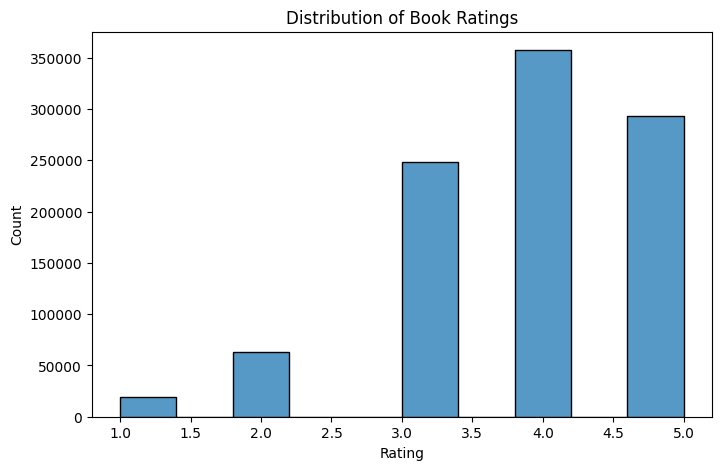

First 5 records:    book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1     1185       4


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of book ratings
plt.figure(figsize=(8, 5))
sns.histplot(ratings_df['rating'], bins=10, kde=False)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

print("First 5 records:", ratings_df.head())

## Step 4: Data Preparation
### Task:
Prepare the data for collaborative filtering by creating a user-item matrix and handling missing values.

### Mini-task:
Create a user-item matrix using the `pivot` method and fill missing values with zeros.

#### Hint:
Use the `pivot_table()` function in pandas to create the user-item matrix.

```python
# Create a user-item matrix
### YOUR CODE HERE ###
```

---

In [19]:
# Create a user-item matrix
user_item_matrix = ratings_df.pivot_table(index='user_id', columns='book_id', values='rating', fill_value=0)
user_item_matrix.head(10)

book_id,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Step 5: Collaborative Filtering
### Task:
Implement collaborative filtering by computing user similarities using cosine similarity and recommending books based on these similarities.

### Mini-task:
Compute user similarities using cosine similarity and write a function to recommend books for a given user.

#### Hint:
Use `cosine_similarity` from `sklearn.metrics.pairwise` to compute user similarities.

```python
from sklearn.metrics.pairwise import cosine_similarity

# Compute user similarities
### YOUR CODE HERE ###

# Write a function to recommend books for a given user
### YOUR CODE HERE ###
```

---

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from scipy.sparse import csr_matrix

# Sample 100 users and 100 books for testing due to its size to avoid memory issues
sampled_matrix = user_item_matrix.iloc[:100, :100]
# Convert user-item matrix to sparse format 
user_item_sparse = csr_matrix(sampled_matrix.values)

# Compute user similarities using sparse matrix
user_similarities = cosine_similarity(user_item_sparse)

# Function to recommend books for a given user
def recommend_books(user_id, user_item_matrix, user_similarities, books_df, top_n=5):
    # Get the index of the user
    user_idx = user_item_matrix.index.get_loc(user_id)
    # Get similarity scores for the user
    sim_scores = user_similarities[user_idx]
    # Get ratings of all users
    user_ratings = user_item_matrix.values
    # Compute weighted sum of ratings
    weighted_ratings = np.dot(sim_scores, user_ratings)
    # Normalize by sum of similarities
    sim_sums = np.array([np.abs(sim_scores).sum()] * user_ratings.shape[1])
    scores = weighted_ratings / sim_sums
    # Exclude books already rated by the user
    already_rated = user_item_matrix.iloc[user_idx] > 0
    scores[already_rated.values] = -1
    # Get top N recommendations
    top_indices = np.argsort(scores)[-top_n:][::-1]
    recommended_book_ids = user_item_matrix.columns[top_indices]
    return books_df[books_df['book_id'].isin(recommended_book_ids)]

# Example usage:
recommend_books(user_id=1, user_item_matrix=sampled_matrix, user_similarities=user_similarities, books_df=books_df, top_n=5)

C:\Users\onuoh\AppData\Local\Temp\ipykernel_33712\2815544879.py:25: RuntimeWarning: invalid value encountered in divide
  scores = weighted_ratings / sim_sums


,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
7682,7683,98,98,4462,45,761129588,9.780761e+12,"Heidi Murkoff, Sharon Mazel, Heidi Murkoff, Ar...",1989.0,What to Expect the First Year,...,10807,13247,784,359,816,3301,4586,4185,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...


## Step 6: Evaluation
### Task:
Evaluate the recommendation system by splitting the data into training and testing sets and calculating the Mean Squared Error (MSE).

### Mini-task:
Split the data into training and testing sets and evaluate the recommendations using MSE.

#### Hint:
Use `train_test_split` from `sklearn.model_selection` to split the data and `mean_squared_error` from `sklearn.metrics` to calculate MSE.

```python
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
### YOUR CODE HERE ###

# Evaluate the recommendations using MSE
### YOUR CODE HERE ###
```

---

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import numpy as np

# Split the ratings data into training and testing sets
train_df, test_df = train_test_split(ratings_df, test_size=0.2, random_state=42)

# Create user-item matrices for train and test sets
train_matrix = train_df.pivot_table(index='user_id', columns='book_id', values='rating', fill_value=0)
test_matrix = test_df.pivot_table(index='user_id', columns='book_id', values='rating', fill_value=0)

# Align the test matrix to the train matrix shape
test_matrix = test_matrix.reindex(index=train_matrix.index, columns=train_matrix.columns, fill_value=0)

# --- MEMORY FIX: Use a sample for similarity calculation ---

# Find users and books present in BOTH train and test sets
common_users = train_matrix.index.intersection(test_matrix.index)
common_books = train_matrix.columns.intersection(test_matrix.columns)

# Sample a subset for memory efficiency
sample_users = 100
sample_books = 100
sampled_user_ids = common_users[:sample_users]
sampled_book_ids = common_books[:sample_books]

# Reindex both matrices to the same users and books, filling missing with 0
train_matrix_sample = train_matrix.reindex(index=sampled_user_ids, columns=sampled_book_ids, fill_value=0)
test_matrix_sample = test_matrix.reindex(index=sampled_user_ids, columns=sampled_book_ids, fill_value=0)

# Now proceed as before
train_sparse = csr_matrix(train_matrix_sample.values)
user_similarities = cosine_similarity(train_sparse)

def predict_ratings(user_item_matrix, user_similarities):
    sim_sums = np.abs(user_similarities).sum(axis=1, keepdims=True)
    sim_sums[sim_sums == 0] = 1  # avoid division by zero
    return np.dot(user_similarities, user_item_matrix.values) / sim_sums

predicted_ratings = predict_ratings(train_matrix_sample, user_similarities)

# Only evaluate on the test set where ratings exist
test_mask = test_matrix_sample.values > 0
if np.any(test_mask):
    mse = mean_squared_error(test_matrix_sample.values[test_mask], predicted_ratings[test_mask])
    print("Mean Squared Error (MSE) on test set (sampled):", mse)
else:
    print("No nonzero ratings in the sampled test set to evaluate MSE.")

No nonzero ratings in the sampled test set to evaluate MSE.


## Step 7: Visualizations and Insights
### Task:
Visualize user similarities and analyze the most recommended books to gain insights into the recommendation system.

### Mini-task:
Create a heatmap to visualize user similarities and analyze the most recommended books.

#### Hint:
Use `seaborn.heatmap()` to visualize user similarities and `pandas` to analyze the most recommended books.

```python
# Create a heatmap to visualize user similarities
### YOUR CODE HERE ###

# Analyze the most recommended books
### YOUR CODE HERE ###
```

---

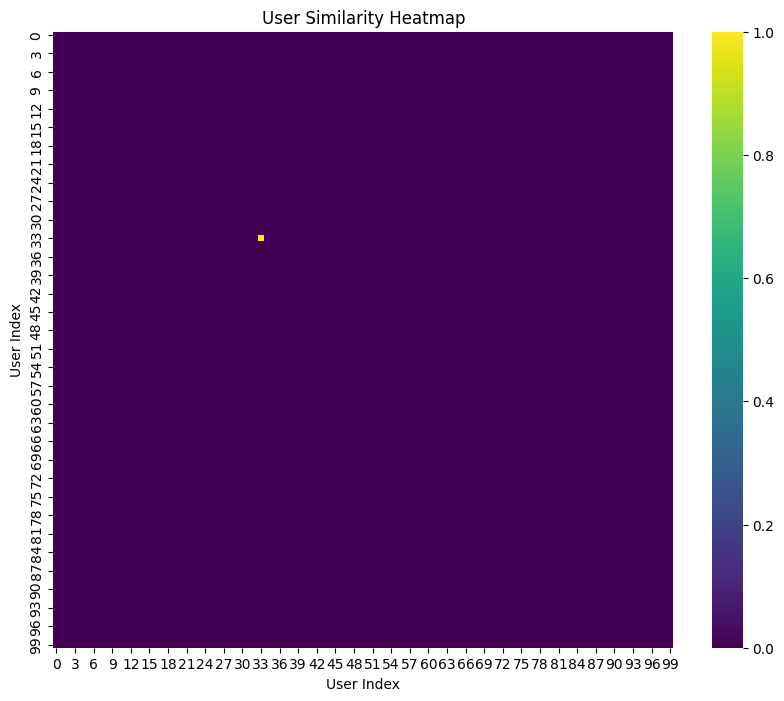

Top 5 most rated books in the sample:
    book_id                                              title  \
1         3  Harry Potter and the Sorcerer's Stone (Harry P...   
17        5  Harry Potter and the Prisoner of Azkaban (Harr...   
20        2  Harry Potter and the Order of the Phoenix (Har...   
26        1  Harry Potter and the Half-Blood Prince (Harry ...   

                                    authors  
1               J.K. Rowling, Mary GrandPré  
17  J.K. Rowling, Mary GrandPré, Rufus Beck  
20              J.K. Rowling, Mary GrandPré  
26              J.K. Rowling, Mary GrandPré  


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize user similarities
plt.figure(figsize=(10, 8))
sns.heatmap(user_similarities, cmap='viridis')
plt.title('User Similarity Heatmap')
plt.xlabel('User Index')
plt.ylabel('User Index')
plt.show()

# Analyze the most recommended books
# Count the number of ratings for each book in the sample
most_rated_books = train_matrix_sample.sum(axis=0).sort_values(ascending=False)
top_books = most_rated_books.head(5).index
top_books_info = books_df[books_df['book_id'].isin(top_books)]

print("Top 5 most rated books in the sample:")
print(top_books_info[['book_id', 'title', 'authors']])


## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of collaborative filtering in recommendation systems.
- Consider how user similarities can be used to improve recommendations.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key insights.
- Discuss the impact of user similarities on book recommendations.

**What would you share with and recommend to stakeholders?**
- Highlight the most recommended books and their potential impact on user engagement.
- Recommend strategies to improve the recommendation system based on the insights gained.

**Key Takeaways from this Project:**
- Collaborative filtering is a powerful approach for building recommendation systems by leveraging user behavior and similarities.
- Creating a user-item matrix and computing user similarities (e.g., with cosine similarity) are essential steps for collaborative filtering.
- Handling large datasets may require sampling or using sparse matrices to avoid memory issues.
- Evaluating the system with metrics like Mean Squared Error (MSE) helps measure recommendation accuracy.
- Visualizing user similarities and popular books provides valuable insights into user behavior and system performance.

**How I Would Share My Findings with a Team:**
- Present visualizations such as the user similarity heatmap and the list of most recommended books.
- Summarize the methodology, results, and key insights in a clear and concise report or presentation.
- Discuss the impact of user similarities on recommendations and suggest possible improvements or next steps.

**What I Would Share with and Recommend to Stakeholders:**
- Highlight the most recommended books and explain how the recommendation system can increase user engagement and sales.
- Recommend regular updates to the model as more user data becomes available.
- Suggest exploring hybrid approaches (combining collaborative and content-based filtering) for even better recommendations.
- Emphasize the importance of user privacy and ethical considerations in deploying recommendation systems.